<a href="https://colab.research.google.com/github/Ezemettler/PI1-MLOps/blob/main/EDA_Analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis exploratorio de los datos: (Exploratory Data Analysis-EDA)

Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables de los datasets, ver si hay outliers o anomalías (que no tienen que ser errores necesariamente 👀 ), y ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior. 

Sabes que puedes apoyarte en librerías como pandas profiling, sweetviz, autoviz, entre otros y sacar de allí tus conclusiones 😉

In [1]:
# Vinculamos google colab con google drive para importar el dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Importamos librerias

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
# Levantamos los datasets a analizar, y guardamos en una variable

data_score = pd.read_csv('/content/drive/MyDrive/Formación/Henry/PI N°1 - MLOps/score.csv', sep=',', encoding='latin-1')

In [8]:
# Visualizamos las columnas del dataset y sus primeros registros

data_score.head()

,userId,rating,timestamp,movieId
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186
2,1,5.0,2015-03-09,hs2381
3,1,5.0,2015-03-09,ns3663
4,1,5.0,2015-03-09,as9500


In [10]:
# Cantidad de filas y columnas del dataset

print("Cant registros:", data_score.shape[0])
print("Cant columnas:", data_score.shape[1])

Cant registros: 11024289
Cant columnas: 4


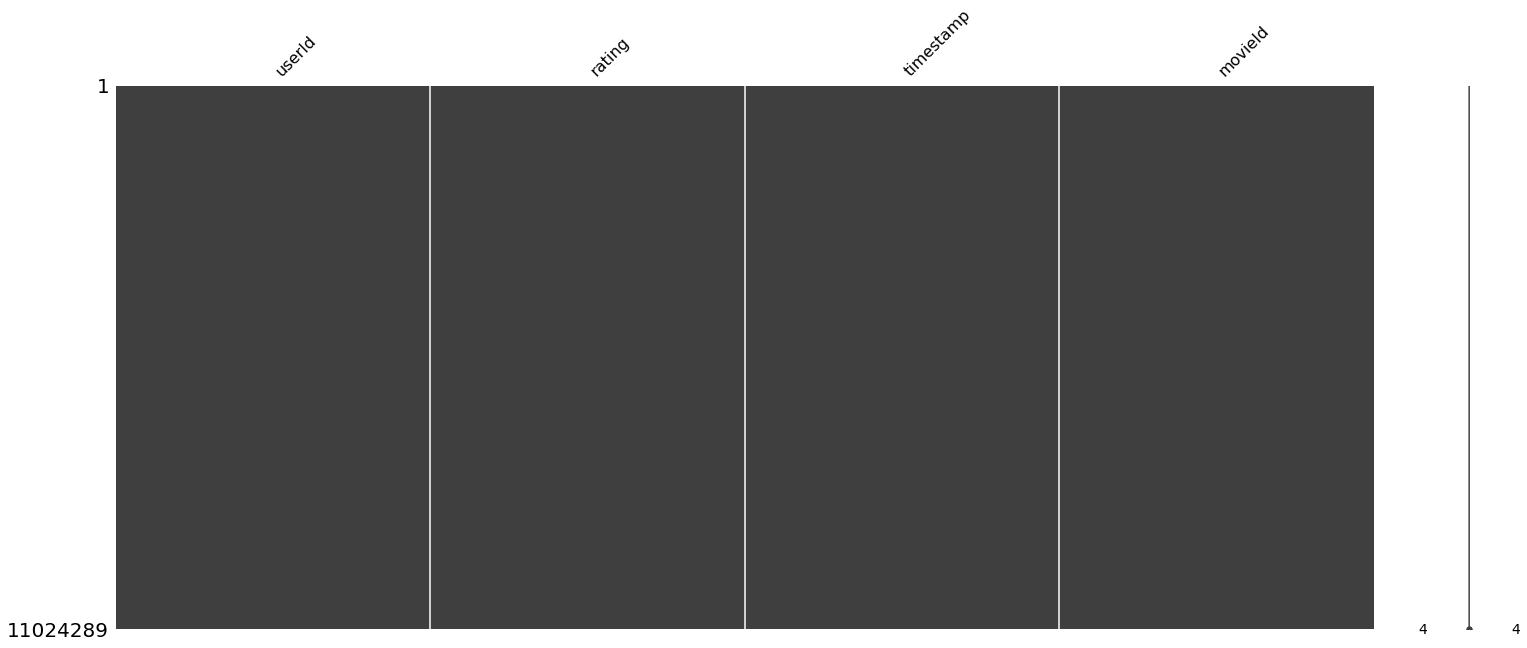

In [12]:
# Vemos si hay huecos en la información a través de una visualización
# Esta gráfica muestra de manera sencilla si tenemos datos faltantes.

msno.matrix(data_score);

In [13]:
# Verificamos de esta otra forma, que no existan valores nulos o faltantes.

data_score.isna().sum()

userId       0
rating       0
timestamp    0
movieId      0
dtype: int64

In [14]:
# Observamos tipos de datos que tiene el dataset, y que espacio ocupa en memoria

data_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   rating     float64
 2   timestamp  object 
 3   movieId    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 336.4+ MB


In [15]:
# Correlación entre variables del dataset

data_score.corr()

,userId,rating
userId,1.000000,0.004608
rating,0.004608,1.000000


In [19]:
# Verificamos si existen registros duplicados

data_score.duplicated().sum()

10466

In [20]:
# Eliminamos los valores duplicados

data_score.drop_duplicates(inplace=True)

In [21]:
# Verificamos que la cant de registros se hayan reducido en 10466

print("Nueva cant registros:", data_score.shape[0])

Nueva cant registros: 11013823


# Preguntas

In [29]:
# Cuántos usuarios votaron?

data_score['userId'].nunique()

115077

In [34]:
# Cual es el valor promedio de votacion?

prom = data_score['rating'].mean().round(2)
print("Valor promedio:", prom)

Valor promedio: 3.53


In [32]:
# Cual es el valor minimo y maximo de votacion?

min = data_score['rating'].min()
print("Valor minimo:", min)


max = data_score['rating'].max()
print("Valor maximo:", max)

Valor minimo: 0.5
Valor maximo: 5.0
